# Modelo de Examen Practico - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).

## Actividades: 

### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de las calificaciones en un DataFrame, que es la estructura de datos fundamental para el análisis con Pandas.

Importamos la librería pandas como pd y, ya que estamos, la librería matplotlib para después hacer los gráficos. El CSV es cargado a través del método read_csv.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("datasets_calificaciones.csv")

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. Esto incluye mostrar las primeras filas, obtener un resumen de la información del DataFrame (tipos de datos, valores no nulos) y calcular estadísticas descriptivas de las columnas numéricas.

Todo lo mencionado anteriormente se realiza a través de los métodos de pandas como el head, isnull y dtypes. Además, se aplicó el método describe para realizar el cálculo estadistico y es necesario aclarar que para realizar eso, se tuvo que cambiar el tipo de dato de las columnas numéricas, ya que antes eran strings.

In [2]:
df.head()

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,ana pérez,matematicas,8,7.5,9,95%
1,carlos lópez,fisica,6.2,7,NaN,88%
2,maría gómez,quimica,9,8.8,9.5,100%
3,pedro rodríguez,historia,7.5,6,7,75
4,laura vargas,matematicas,,9.2,8.5,92%


In [3]:
df.isnull().sum()

estudiante     0
Materia        0
Parcial 1      5
Parcial 2     10
Final         11
Asistencia     0
dtype: int64

In [4]:
df.dtypes

estudiante    object
Materia       object
Parcial 1     object
Parcial 2     object
Final         object
Asistencia    object
dtype: object

In [5]:
df["Parcial 1"] = pd.to_numeric(df["Parcial 1"], errors = "coerce").fillna(0).astype(float)

df["Parcial 2"] = pd.to_numeric(df["Parcial 2"], errors = "coerce").fillna(0).astype(float)

df["Final"] = pd.to_numeric(df["Final"], errors = "coerce").fillna(0).astype(float)

df["Asistencia"] = df["Asistencia"].str.replace("%", "").fillna(0).astype(int)

In [6]:
df.describe()

,Parcial 1,Parcial 2,Final,Asistencia
count,100.00000,100.000000,100.000000,100.00000
mean,6.89200,6.891000,6.710000,88.27000
std,2.79804,2.787566,3.043075,8.58217
min,0.00000,0.000000,0.000000,70.00000
25%,6.37500,6.500000,6.375000,81.75000
50%,7.60000,7.500000,7.450000,88.50000
75%,8.80000,8.800000,8.825000,96.00000
max,9.90000,9.900000,9.900000,103.00000


### 3. Limpieza y Normalización de los Datos

Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes, la inconsistencia en el formato de la columna 'Asistencia', los posibles valores atípicos y la normalización de los nombres de estudiantes y materias a un formato consistente (por ejemplo, capitalización).

Se realizó el tratamiento de la columna de Asistencia, debido a que ciertos valores eran mayores al 100%. Se realizó el método de imputación y se capitalizaron los nombres y materias.

In [7]:
df["Asistencia"] = df["Asistencia"].apply(lambda x: 100 if x > 100 else x)

In [8]:
df["Final"] = df["Final"].replace(0, np.nan)
df["Parcial 1"] = df["Parcial 1"].replace(0, np.nan)
df["Parcial 2"] = df["Parcial 2"].replace(0, np.nan)

df["Final"].fillna(df["Final"].median(), inplace = True)
df["Parcial 1"].fillna(df["Parcial 1"].median(), inplace = True)
df["Parcial 2"].fillna(df["Parcial 2"].median(), inplace = True)

C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_1848\861215059.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Final"].fillna(df["Final"].median(), inplace = True)
C:\Users\IPF-2025\AppData\Local\Temp\ipykernel_1848\861215059.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

In [9]:
df["estudiante"] = df["estudiante"].str.title()
df["Materia"] = df["Materia"].str.title()

In [10]:
df.head(10)

,estudiante,Materia,Parcial 1,Parcial 2,Final,Asistencia
0,Ana Pérez,Matematicas,8.0,7.5,9.0,95
1,Carlos López,Fisica,6.2,7.0,7.8,88
2,María Gómez,Quimica,9.0,8.8,9.5,100
3,Pedro Rodríguez,Historia,7.5,6.0,7.0,75
4,Laura Vargas,Matematicas,7.9,9.2,8.5,92
5,Javier Soto,Fisica,5.8,6.5,6.0,80
6,Sofia Díaz,Ciencias Sociales,9.5,9.1,7.8,98
7,Miguel Fernández,Literatura Universal,8.0,7.8,8.2,85
8,Valentina Ruiz,Matematicas,7.0,7.7,7.8,90
9,Diego Castro,Fisica,6.8,7.2,7.5,93


### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos. También se pueden calcular estadísticas específicas por grupo (por ejemplo, promedio de calificaciones por materia).

Se calculó el promedio de las notas por matería, el promedio de asistencia por matería y se mostraron las notas finales máximas y minimas por materia.

In [11]:
df.describe()

,Parcial 1,Parcial 2,Final,Asistencia
count,100.000000,100.000000,100.000000,100.000000
mean,7.840000,7.815000,7.880000,88.180000
std,1.134402,1.109771,1.111646,8.445165
min,5.500000,5.800000,5.700000,70.000000
25%,7.075000,6.975000,7.100000,81.750000
50%,7.900000,7.700000,7.800000,88.500000
75%,8.800000,8.800000,8.825000,96.000000
max,9.900000,9.900000,9.900000,100.000000


In [12]:
promedio_notas_materias = df.groupby("Materia")[["Parcial 1", "Parcial 2", "Final"]].mean()
promedio_notas_materias

,Parcial 1,Parcial 2,Final
Materia,,,
Ciencias Sociales,9.500000,9.100000,7.800000
Fisica,6.587500,6.833333,6.620833
Historia,7.375000,7.020833,7.466667
Literatura Universal,8.000000,7.800000,8.200000
Matematicas,8.104000,8.220000,8.456000
Programacion Basica,7.900000,5.900000,6.300000
Quimica,9.204167,9.195833,9.008333


In [13]:
promedio_asistencia = df.groupby("Materia")[["Asistencia"]].mean()
promedio_asistencia

,Asistencia
Materia,
Ciencias Sociales,98.000000
Fisica,82.208333
Historia,80.083333
Literatura Universal,85.000000
Matematicas,92.680000
Programacion Basica,82.000000
Quimica,97.541667


In [14]:
nota_final_max_min = df.groupby("Materia")[["Final"]].agg(["min", "max"])
nota_final_max_min

Final     
                       min  max
Materia                        
Ciencias Sociales      7.8  7.8
Fisica                 5.7  8.1
Historia               6.4  8.8
Literatura Universal   8.2  8.2
Matematicas            7.1  9.6
Programacion Basica    6.3  6.3
Quimica                7.8  9.9

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear visualizaciones que permitan comprender mejor la distribución de las calificaciones y la asistencia. Se generarán histogramas, diagramas de dispersión y gráficos de barras.

Se realizaron distintos tipos de gráficos a través de promedios.

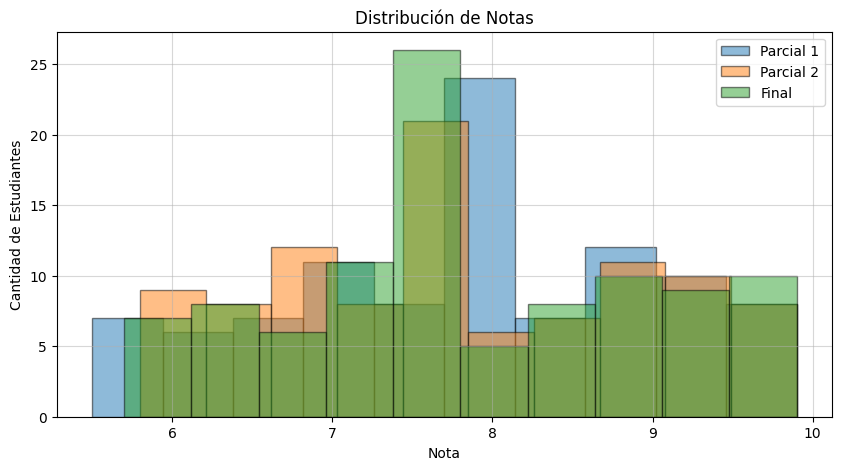

In [15]:
plt.figure(figsize=(10,5))
plt.hist(df['Parcial 1'], alpha = 0.5, label='Parcial 1', edgecolor = "black")
plt.hist(df["Parcial 2"], alpha = 0.5, label = 'Parcial 2', edgecolor = "black")
plt.hist(df["Final"], alpha = 0.5, label = 'Final', edgecolor = "black")
plt.title("Distribución de Notas")
plt.xlabel("Nota")
plt.legend()
plt.ylabel("Cantidad de Estudiantes")
plt.grid(True, alpha = 0.5)
plt.show()

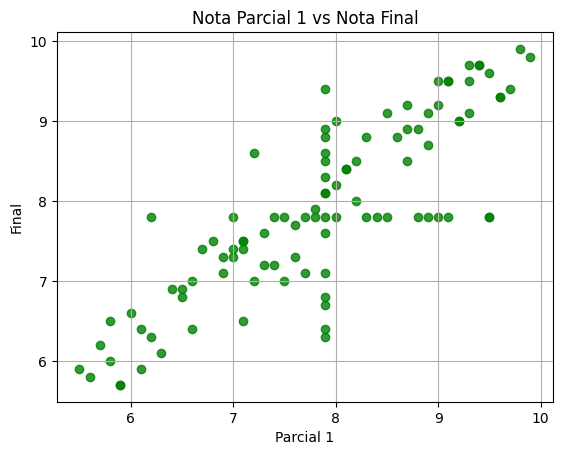

In [16]:
plt.scatter(df["Parcial 1"], df["Final"], alpha= 0.8, color = "green")
plt.title("Nota Parcial 1 vs Nota Final")
plt.xlabel("Parcial 1")
plt.ylabel("Final")
plt.grid(True)
plt.show()

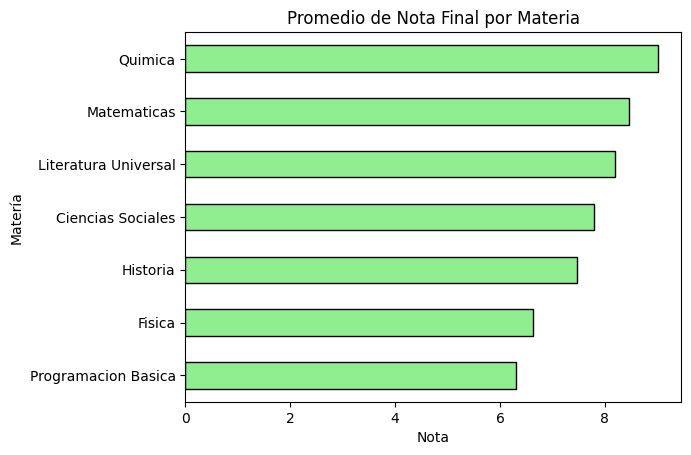

In [17]:
promedio_final = df.groupby("Materia")["Final"].mean().sort_values()
promedio_final.plot(kind = "barh", edgecolor="black", color = "lightgreen")
plt.title("Promedio de Nota Final por Materia")
plt.xlabel("Nota")
plt.ylabel("Matería")
plt.show()

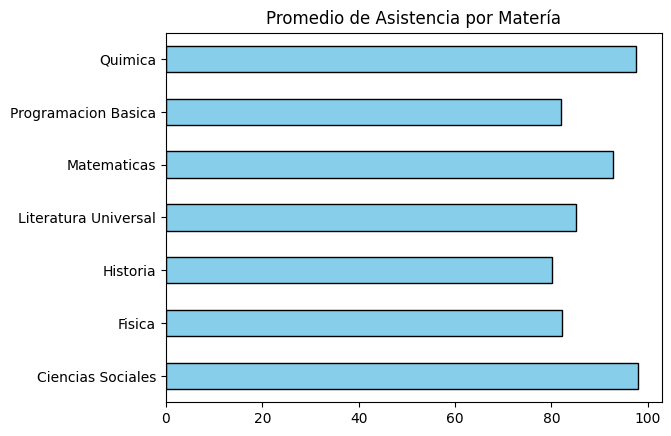

In [18]:
promedio_asistencia = df.groupby("Materia")["Asistencia"].mean()
promedio_asistencia.plot(kind = "barh", edgecolor = "black", color = "skyblue")
plt.title("Promedio de Asistencia por Matería")
plt.xlabel("")
plt.ylabel("")
plt.show()

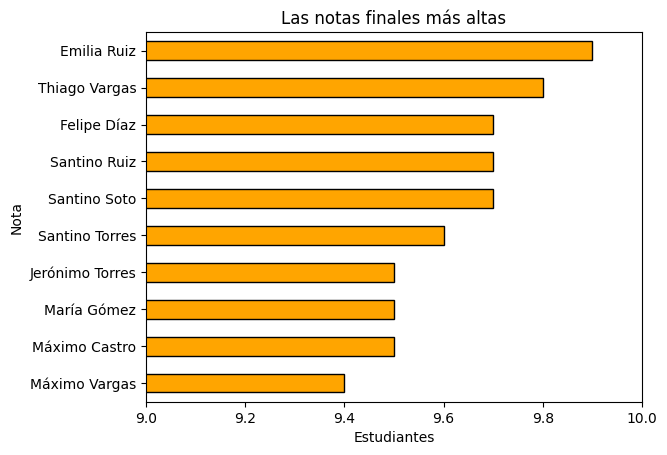

In [19]:
top_notas_finales = df.groupby("estudiante")["Final"].mean().sort_values(ascending=False).head(10)
top_notas_finales.plot(kind = "barh", edgecolor = "black", color = "orange")
plt.title("Las notas finales más altas")
plt.xlim(9, 10)
plt.xlabel("Estudiantes")
plt.ylabel("Nota")
plt.gca().invert_yaxis()
plt.show()

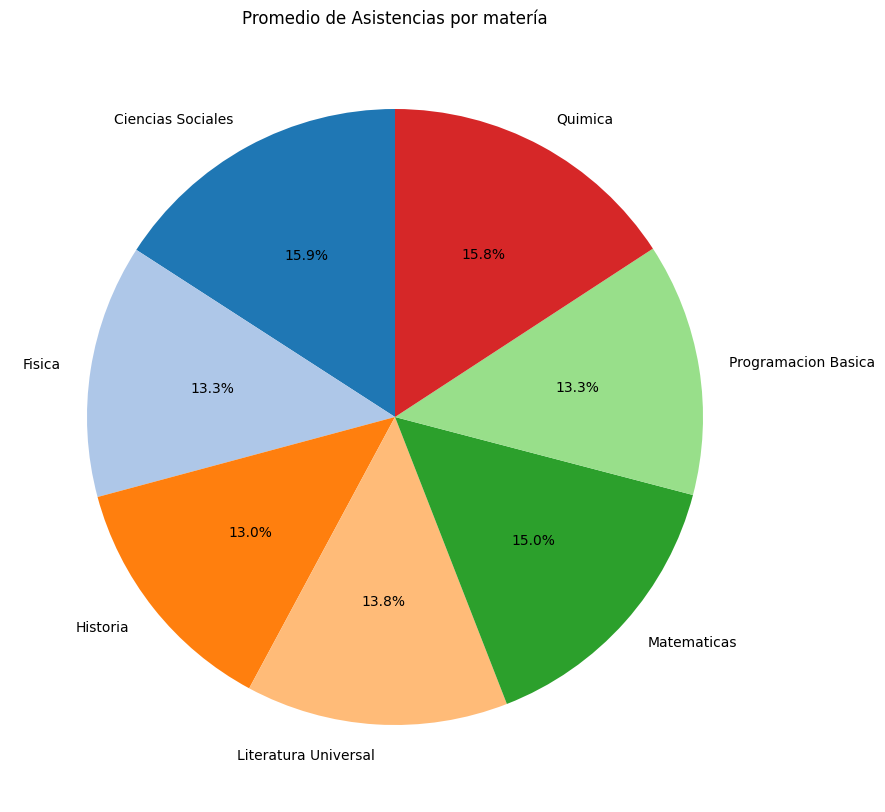

In [20]:
promedio_asistencia_materia = df.groupby("Materia")["Asistencia"].mean()
plt.figure(figsize= (10,10))
promedio_asistencia_materia.plot(kind = "pie", autopct = "%1.1f%%", startangle = 90, colors = plt.cm.tab20.colors)
plt.title("Promedio de Asistencias por matería")
plt.xlabel("")
plt.ylabel("")
plt.show()


### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Esto permite almacenar los datos de forma estructurada para su posterior consulta y uso.

Hay que aclarar que debe existir la conexión SQL para poder exportar el CSV a SQL.

In [21]:
import sqlite3

conn = sqlite3.connect("datasets_calificaciones.db")
df.to_sql("datasets_calificaciones", conn, index=False)
conn.close()